# Predicting Heart Disesase using classification algorithms

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv("Datasets/heart.csv")

print(df.head())
#sns.pairplot(df)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


# Data Exploration

In [2]:
print(df.tail())

print(df.describe())

df.columns

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Variables:

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


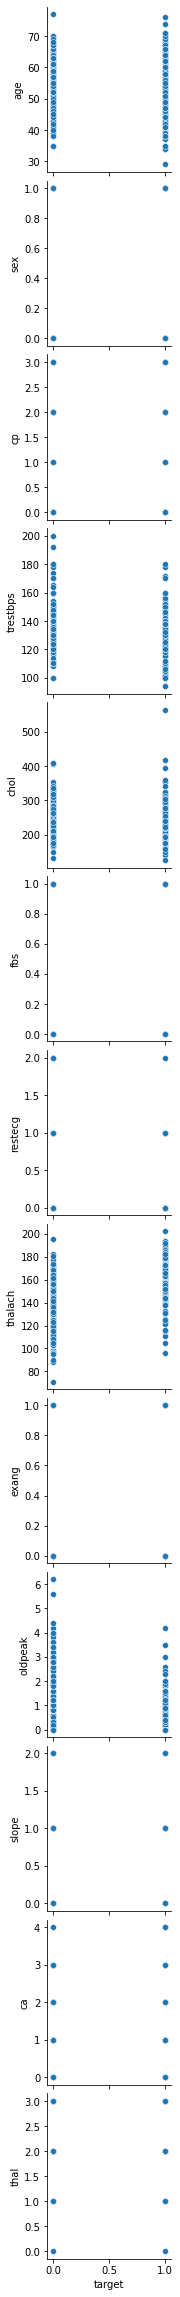

In [3]:
sns.pairplot(data=df,y_vars=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], x_vars=['target'])

df.corr()

<AxesSubplot:title={'center':'Target bar graph'}>

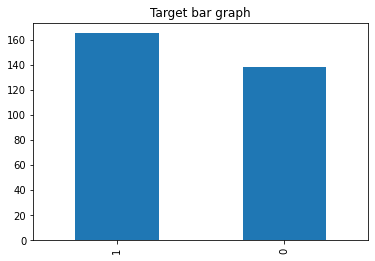

In [4]:
from matplotlib import pyplot as plt


df.target.value_counts().plot(kind='bar', title='Target bar graph')


In [5]:
bins= [20,30,40,50,60,70,110]
labels = ['20-30','30-40','40-50','50-60','60-70','70+']
df['Agegroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Agegroup
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50-60


<AxesSubplot:xlabel='Agegroup', ylabel='target'>

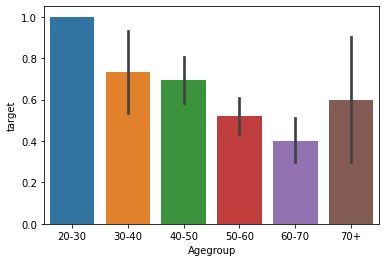

In [6]:
sns.barplot(data=df, x='Agegroup', y='target')

<AxesSubplot:xlabel='fbs', ylabel='target'>

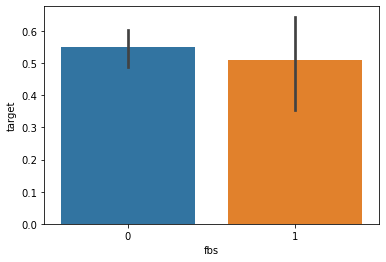

In [7]:
sns.barplot(data=df, x='fbs', y='target')


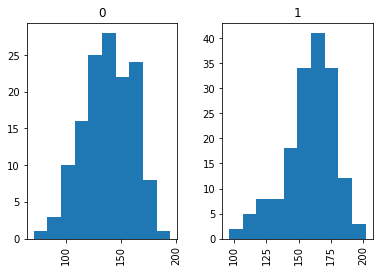

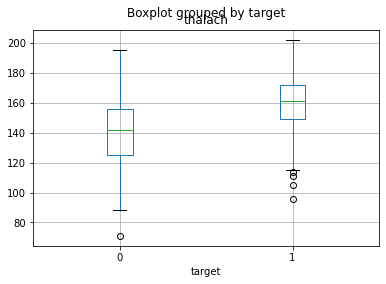

In [8]:
import matplotlib.pyplot as plt

df['thalach'].hist(by=df['target'])

boxplot = df.boxplot(column='thalach', by='target')

<AxesSubplot:xlabel='restecg', ylabel='target'>

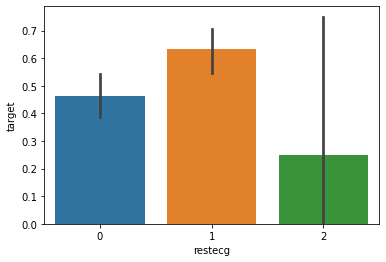

In [9]:
sns.barplot(data=df, x='restecg', y='target')


<AxesSubplot:xlabel='exang', ylabel='target'>

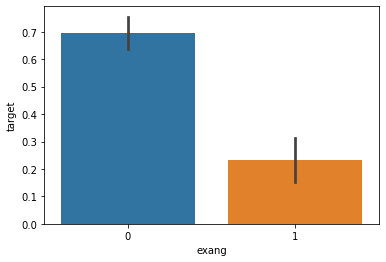

In [10]:
sns.barplot(data=df, x='exang', y='target')

In [11]:
#interestingly wle see lower rates of heart disease in older individuals, until we reach 70

df['Agegroup'].value_counts()

50-60    125
60-70     80
40-50     72
30-40     15
70+       10
20-30      1
Name: Agegroup, dtype: int64

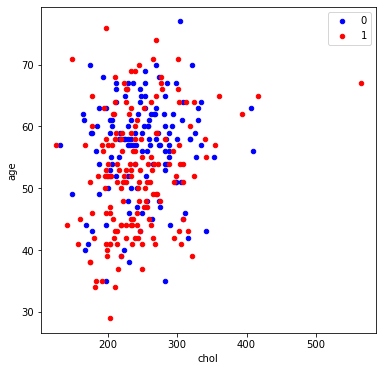

In [12]:
#we see very high rates for the 20-30 category, because there is only 1 observation.

fig, ax = plt.subplots(figsize=(6, 6))

colors = {0:'blue', 1:'red'}

grouped = df.groupby('target')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='chol', y='age', label=key, color=colors[key])
plt.show()



# Model Creation

In [13]:
#getting a test and train set

y = df['target']
x = df.drop(['target', 'Agegroup'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
#Logistic regression

In [ ]:
#LDA

In [ ]:
#Random Forest

In [ ]:
#SVM

In [ ]:
#KNN

In [ ]:
#Naive Bayes